<a href="https://colab.research.google.com/github/SasiduNimesh/Image_Classification/blob/main/CatDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install kaggle

In [10]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
# importing the data set
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:07<00:00, 234MB/s]
100% 812M/812M [00:07<00:00, 118MB/s]


In [12]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
from zipfile import ZipFile
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [14]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of Images: ', file_count)

Number of Images:  25000


In [15]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.7711.jpg', 'cat.1664.jpg', 'cat.10373.jpg', 'dog.8542.jpg', 'dog.3238.jpg', 'cat.11990.jpg', 'dog.7337.jpg', 'cat.1275.jpg', 'cat.9190.jpg', 'cat.8866.jpg', 'dog.1989.jpg', 'dog.3987.jpg', 'cat.6121.jpg', 'cat.10252.jpg', 'dog.12210.jpg', 'dog.12037.jpg', 'cat.6053.jpg', 'dog.5662.jpg', 'dog.12481.jpg', 'dog.2392.jpg', 'cat.737.jpg', 'dog.8270.jpg', 'dog.7250.jpg', 'cat.11151.jpg', 'cat.8949.jpg', 'cat.10937.jpg', 'dog.7546.jpg', 'cat.9423.jpg', 'dog.2747.jpg', 'dog.5192.jpg', 'cat.2690.jpg', 'cat.11752.jpg', 'cat.10627.jpg', 'dog.1894.jpg', 'dog.7751.jpg', 'cat.12105.jpg', 'cat.2733.jpg', 'cat.1932.jpg', 'dog.2857.jpg', 'dog.8216.jpg', 'dog.11121.jpg', 'cat.1553.jpg', 'dog.11160.jpg', 'dog.5388.jpg', 'cat.6246.jpg', 'dog.8665.jpg', 'dog.5026.jpg', 'cat.3791.jpg', 'cat.1514.jpg', 'dog.10623.jpg', 'dog.11729.jpg', 'dog.2819.jpg', 'dog.5992.jpg', 'cat.1718.jpg', 'cat.1078.jpg', 'cat.3224.jpg', 'dog.1797.jpg', 'cat.9047.jpg', 'cat.6977.jpg', 'cat.566.jpg', 'dog.1943.jpg', 'dog.5332.

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

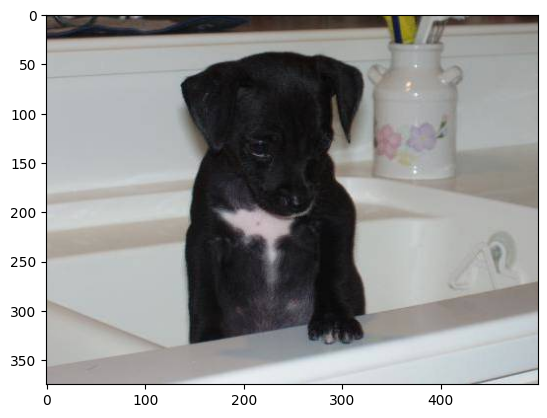

In [17]:
#display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplot = plt.imshow(img)
plt.show()


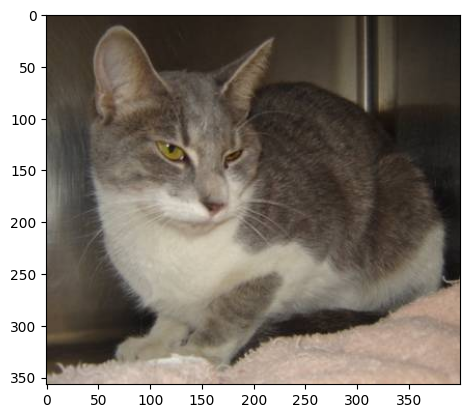

In [18]:
#display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == "dog":
    dog_count += 1

  else:
    cat_count += 1

print("Number of dogs :" , dog_count)
print("Number of cats :" , cat_count)


Number of dogs : 12500
Number of cats : 12500


In [20]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

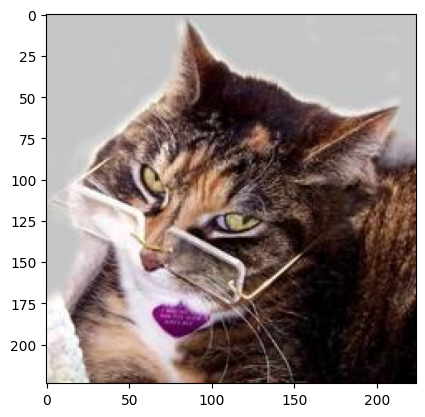

In [23]:
#display resized dog image
img = mpimg.imread('/content/image_resized/cat.10035.jpg')

imgplt = plt.imshow(img)
plt.show()

creating labels for resized images of dog and cats

cat --> 0
dog --> 1


In [24]:
#creating a for loop to assign label
file_names = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [25]:
print(file_names[0:5])
print(len(file_names))

['dog.7711.jpg', 'cat.1664.jpg', 'cat.10373.jpg', 'dog.8542.jpg', 'dog.3238.jpg']
2000


In [26]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [27]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 984 1016]


In [28]:
#converting all the resized images to numpy arrays
import cv2
import glob


In [29]:
image_directory = '/content/image_resized/'
image_extenstion = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory +'*.'+ e )) for e in image_extenstion]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)

[[[[130  99  76]
   [117  86  63]
   [119  86  66]
   ...
   [127  94  75]
   [109  76  60]
   [133 100  84]]

  [[134 103  80]
   [116  85  62]
   [107  74  54]
   ...
   [111  79  60]
   [104  71  55]
   [135 102  86]]

  [[125  94  71]
   [120  89  66]
   [114  83  62]
   ...
   [120  87  71]
   [108  75  59]
   [125  95  78]]

  ...

  [[127  96  71]
   [127  96  71]
   [130  99  76]
   ...
   [141 107  78]
   [137 100  72]
   [129  95  65]]

  [[135 106  79]
   [135 106  79]
   [128  98  73]
   ...
   [133  96  68]
   [130  92  62]
   [119  84  51]]

  [[130 101  74]
   [133 104  77]
   [122  92  67]
   ...
   [122  84  54]
   [128  90  60]
   [126  88  56]]]


 [[[186 192 197]
   [185 191 196]
   [185 191 196]
   ...
   [210 231 255]
   [204 226 254]
   [202 224 252]]

  [[183 189 194]
   [183 189 194]
   [184 190 195]
   ...
   [140 164 194]
   [130 155 187]
   [126 151 183]]

  [[185 191 196]
   [185 191 196]
   [185 191 196]
   ...
   [134 164 199]
   [133 165 201]
   [134 166

In [31]:
X = dog_cat_images
Y = np.asarray(labels)

In [32]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [34]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building the Neural Network**

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 81s 2s/step - loss: 0.2161 - acc: 0.9137
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0682 - acc: 0.9825
Epoch 3/5
50/50 [==============================] - 63s 1s/step - loss: 0.0536 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0387 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0328 - acc: 0.9900


In [41]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0797 - acc: 0.9750
Test Loss = 0.07966895401477814
Test Accuracy = 0.9750000238418579


**Predictive System**

Path of the image to be predicted: /content/img1.jpg


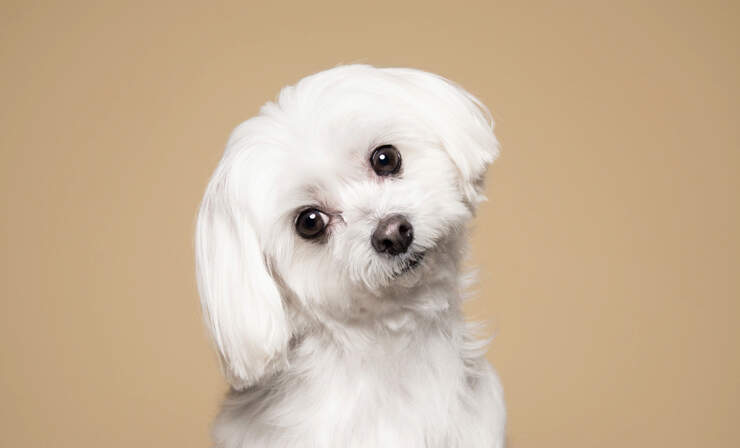

1/1 [==============================] - 1s 916ms/step
[[-2.0629258  2.3891757]]
1
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/img4.jpg


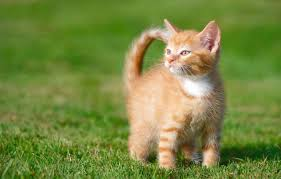

1/1 [==============================] - 0s 56ms/step
[[ 2.0365336 -1.7128922]]
0
The image represents a Cat


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')